## Connected Component Analysis

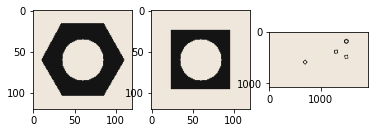

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'Materials\hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'Materials\squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'Materials\conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### 1) Otsu's thresholding

Hexnut_template Threshold = 20.0
Squarenut_template Threshold = 20.0
Conveyor_f100 Threshold = 20.0


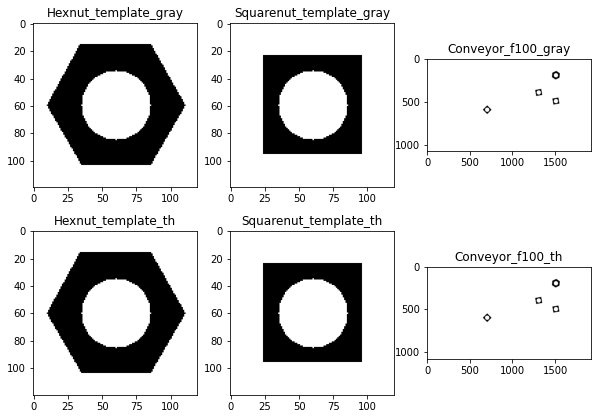

In [5]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret_1,hexnut_template_th = cv.threshold(hexnut_template_gray,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)
ret_2,squarenut_template_th = cv.threshold(squarenut_template_gray,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)
ret_3,conveyor_f100_th = cv.threshold(conveyor_f100_gray,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)

fig, ax = plt. subplots(2,3, figsize= (10,7))
images = [[hexnut_template_gray,squarenut_template_gray,conveyor_f100_gray],[hexnut_template_th,squarenut_template_th,conveyor_f100_th]]
Titles = [['Hexnut_template_gray','Squarenut_template_gray','Conveyor_f100_gray'],['Hexnut_template_th','Squarenut_template_th','Conveyor_f100_th']]
Th_values = [ret_1,ret_2,ret_3]

for c in range(3):
    ax[0,c].imshow(images[0][c],'gray')
    ax[0,c].set_title(Titles[0][c])
    ax[1,c].imshow(images[1][c],'gray')
    ax[1,c].set_title(Titles[1][c])
    print(Titles[1][c][:-3]+' Threshold = '+str(Th_values[c]))
plt.show()


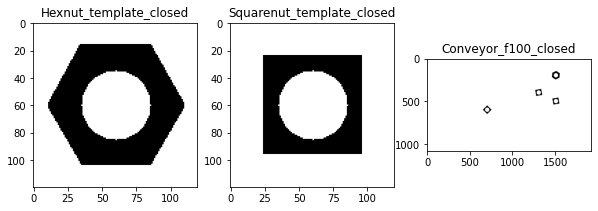

In [6]:
# morphological closing

Closed_images=[]
Closed_titles=['Hexnut_template_closed','Squarenut_template_closed','Conveyor_f100_closed']
kernel_1=np.ones((3,3), np.uint8)
for i in range(3):
    Closed_images.append(cv.morphologyEx(images[1][i], cv.MORPH_CLOSE, kernel_1))

fig, ax = plt. subplots(1,3, figsize= (10,5))
for c in range(3):
    ax[c].imshow(Closed_images[c],'gray')
    ax[c].set_title(Closed_titles[c])
plt.show()



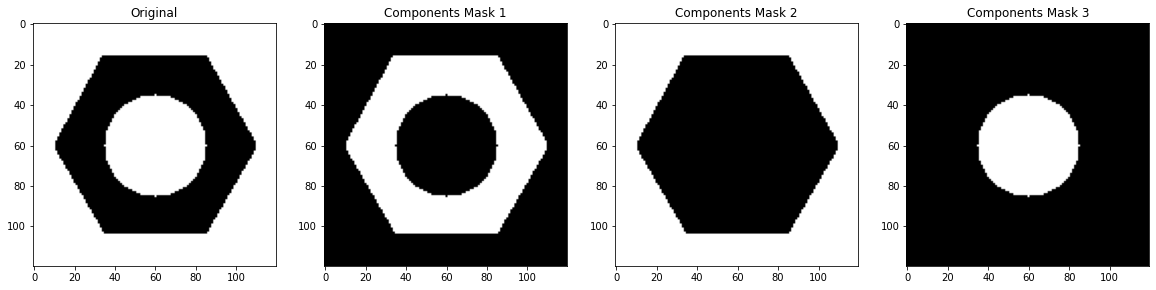

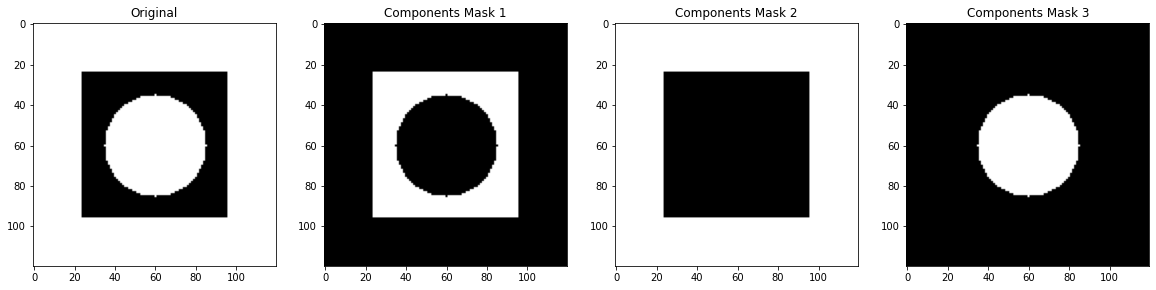

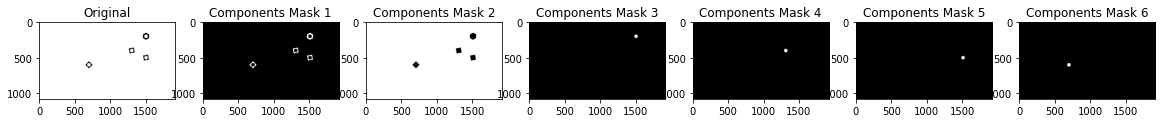

In [11]:
# Connected components
# https://www.geeksforgeeks.org/python-opencv-connected-component-labeling-and-analysis/

for i in range(3):
    img= Closed_images[i]
    (Total_labels, Label_ids, values, centriod)= cv.connectedComponentsWithStats(img,4,cv.CV_32S)
    #out_image = np.zeros(img.shape, dtype= "uint8")   ## can add a super positioned img

    fig, ax = plt.subplots(1,Total_labels+1, figsize =(20,5))
    ax[0].imshow(img,'gray')
    ax[0].set_title("Original")

    for u in range(0,Total_labels): 
        area =values[u, cv.CC_STAT_AREA]    #component area
        # add condition to filter the components, if want
        components_mask = (Label_ids==u).astype("uint8")*255

        ax[u+1].imshow(components_mask,'gray')
        ax[u+1].set_title("Components Mask "+str(u+1))

    cv.waitKey()

    